In [1]:
# %% Veri setinin hazirlanmasi ve preprocessing
from keras.datasets import mnist # load mnist
from keras.utils import to_categorical # kategorik verilere cevirme
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential # sirali model
from keras.layers import Dense # bagli katmamlar

from keras.models import load_model # load model

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

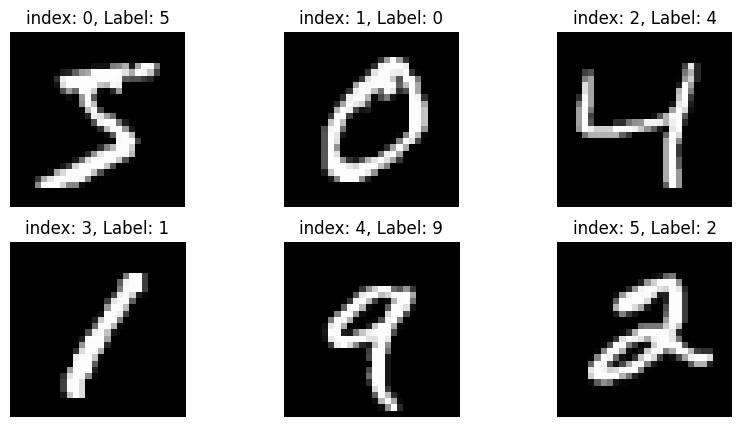

In [3]:
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2, 3 , i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"index: {i}, Label: {y_train[i]}")
    plt.axis("off")
plt.show()


In [4]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2])).astype("float32")/255
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2])).astype("float32")/255

y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)

In [5]:
model = Sequential()

model.add(Dense(512, activation="relu", input_shape = (28*28,)))
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [7]:
early_stopping = EarlyStopping(monitor = "val_loss", patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("ann_best_model.h5", monitor = "val_loss", save_best_only=True)

history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size = 60, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, checkpoint])

Epoch 1/10
800/800 [==============================] - 13s 15ms/step - loss: 0.2183 - accuracy: 0.9337 - val_loss: 0.1119 - val_accuracy: 0.9670
Epoch 2/10
800/800 [==============================] - 16s 20ms/step - loss: 0.0841 - accuracy: 0.9737 - val_loss: 0.0925 - val_accuracy: 0.9718
Epoch 3/10
800/800 [==============================] - 10s 13ms/step - loss: 0.0547 - accuracy: 0.9830 - val_loss: 0.0916 - val_accuracy: 0.9724
Epoch 4/10
800/800 [==============================] - 10s 13ms/step - loss: 0.0383 - accuracy: 0.9871 - val_loss: 0.0896 - val_accuracy: 0.9751
Epoch 5/10
800/800 [==============================] - 10s 12ms/step - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.0890 - val_accuracy: 0.9766
Epoch 6/10
800/800 [==============================] - 10s 12ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.0941 - val_accuracy: 0.9760
Epoch 7/10
800/800 [==============================] - 10s 13ms/step - loss: 0.0213 - accuracy: 0.9928 - val_loss: 0.1167 - val_accuracy:

313/313 [==============================] - 1s 3ms/step - loss: 0.0739 - accuracy: 0.9778
Test acc: 0.9778000116348267, test loss: 0.07385179400444031


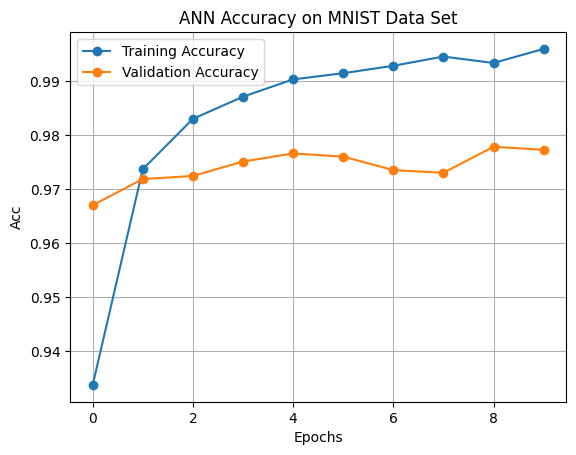

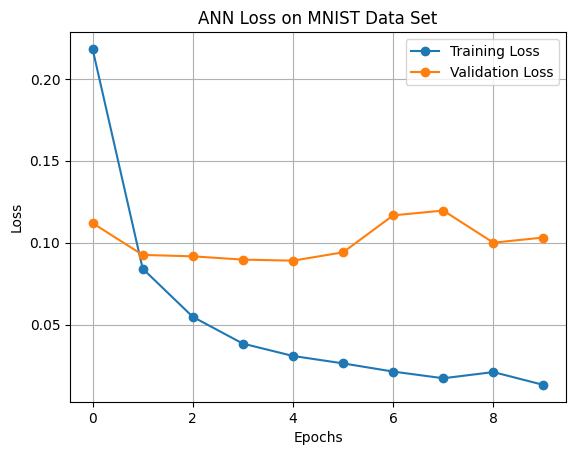

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test acc: {test_acc}, test loss: {test_loss}")

plt.figure()
plt.plot(history.history["accuracy"], marker = "o", label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], marker = "o", label = "Validation Accuracy")
plt.title("ANN Accuracy on MNIST Data Set")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history["loss"], marker = "o", label = "Training Loss")
plt.plot(history.history["val_loss"], marker = "o", label = "Validation Loss")
plt.title("ANN Loss on MNIST Data Set")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
model.save("final_mnist_ann_model.h5")

from keras.models import load_model
loaded_model = load_model("final_mnist_ann_model.h5")

test_loss, test_acc = loaded_model.evaluate(x_test, y_test)
print(f"Loaded Model Result -> Test acc: {test_acc}, test loss: {test_loss}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0739 - accuracy: 0.9778
Loaded Model Result -> Test acc: 0.9778000116348267, test loss: 0.07385179400444031
